<a href="https://colab.research.google.com/github/maciekpojedynski/heart-failure-prediction/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#biblioteki
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Wczytanie danych
heart_disease = pd.read_csv('/content/heart.csv')

In [3]:
print(heart_disease.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [5]:
print(heart_disease.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [6]:
#Sprawdzanie wartosci null
print(heart_disease.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
#Sprawdzanie typów kolumn
print(heart_disease.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


**Sex categories**:
- M = *Male*
- F = *Female*

In [8]:
#Sprawdzanie kategori w kolumnie Sex
print(heart_disease['Sex'].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64


**ChestPainType categories**:
- TA = *Typical Angina*
- ATA = *Atypical Angina*
- NAP = *Non-Anginal Pain*
- ASY = *Asymptomatic*

In [9]:
#Sprawdzanie kategori w kolumnie ChestPainType
print(heart_disease['ChestPainType'].value_counts())

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


**RestingECG categories**:
- Normal = *Normal* (prawidłowy zapis EKG)
- ST = *ST-T wave abnormal* (nieprawidłowy w odcinku ST i/lub załamku T, może wskazywać na niedokrwienie serca, zawał lub inne patologie)
- LVH = *Left ventricular hypertrophy* (przerost lewej komory serca. Może świadczyć o nadciśnieniu, chorobie zastawek lub innych przewlekłych obciażeniach serca)

In [10]:
#Sprawdzanie kategori w RestingECG
print(heart_disease['RestingECG'].value_counts())

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


In [15]:
corr_matrix = heart_disease.corr(numeric_only=True)
corr_matrix['HeartDisease'].sort_values(ascending=False)
#Najlepsze 4 atrybuty



,HeartDisease
HeartDisease,1.000000
Oldpeak,0.422740
Age,0.299410
FastingBS,0.259565
RestingBP,0.138611
Cholesterol,-0.251893
MaxHR,-0.414676


In [19]:
heart_disease['HeartDisease'].value_counts()
#Wymagana stratyfikacja

,count
HeartDisease,
1,401
0,333


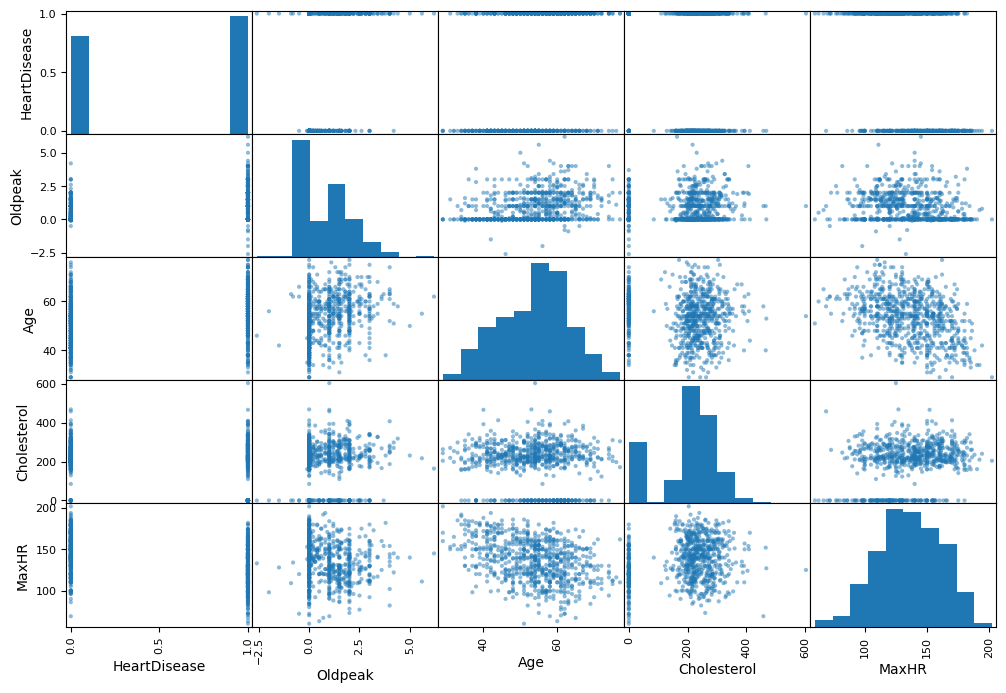

In [46]:
attributes = ['HeartDisease','Oldpeak','Age','Cholesterol','MaxHR']
pd.plotting.scatter_matrix(heart_disease[attributes], figsize = (12,8))
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

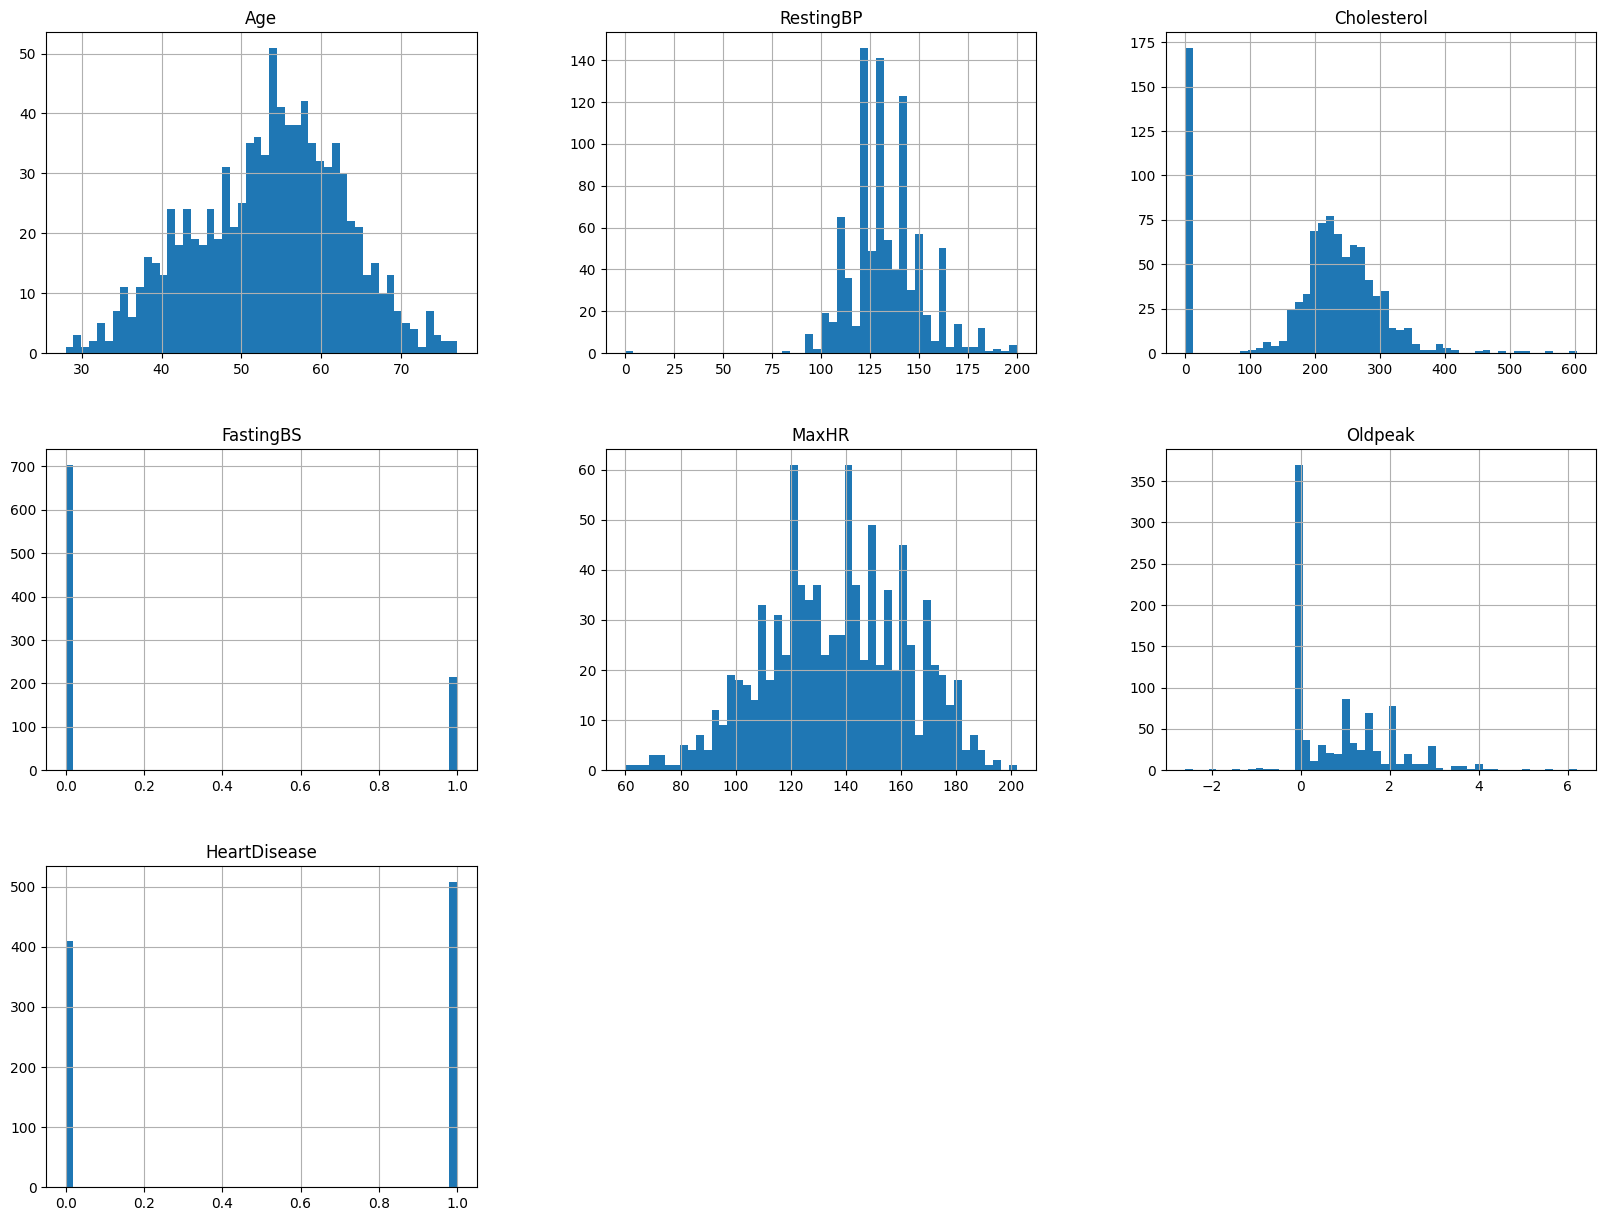

In [11]:
heart_disease.hist(bins = 50, figsize = (20,15))

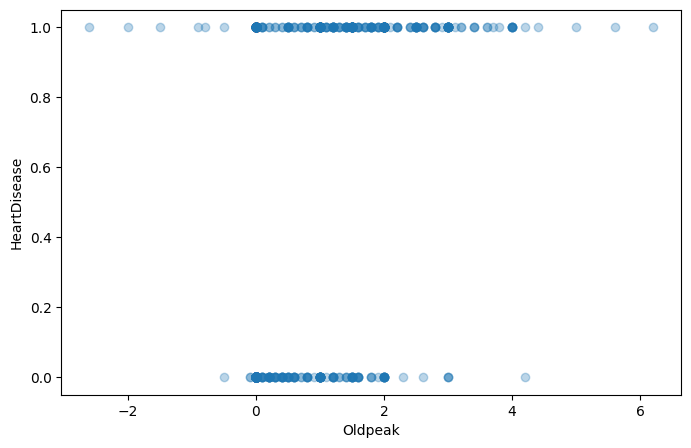

In [45]:
plt.figure(figsize = (8,5))
plt.scatter(heart_disease['Oldpeak'], heart_disease['HeartDisease'], alpha = 0.3)
plt.xlabel('Oldpeak')
plt.ylabel('HeartDisease')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X = heart_disease.drop('HeartDisease', axis = 1)
y = heart_disease['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42
)
